# Random Number Generator

In [270]:
import math
x0 = 1000
a = 24693
c = 3517
K = math.pow(2, 17)

def lcong_randnum(i, num=x0):
    for a in range(i):
        num = ((num * 24693) + 3517) % K
    return num / K

lcong_randnum(1), lcong_randnum(2), lcong_randnum(3)

(0.41947174072265625, 0.0425262451171875, 0.12740325927734375)

In [271]:
u = 0
def rand_num():
    global u
    u += 1
    return lcong_randnum(u, 1000)

In [272]:
rand_num()

0.41947174072265625

## Exponential random var

In [273]:
def exponential_random(mean=12):
    return - mean * (math.log(1 - rand_num()))

In [274]:
x = []
for i in range(1000):
    x.append(exponential_random())

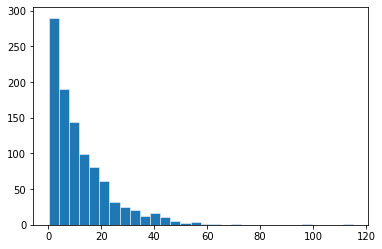

In [275]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots()
ax.hist(x, bins=30, linewidth=0.5, edgecolor="white")
plt.show()

# Simulation

In [276]:
def run_simulation(cumulative_time=0, try_num=1, verbose=False):
    cumulative_time += 6 # Turn on the phone and dial the customer
    random_var = rand_num()
    if random_var <= 0.2: 
        cumulative_time += 3 + 1 # Line was busy, end the call
    elif random_var <= 0.5:
        cumulative_time += 25 + 1 # Customer was unavailable, end the call
    else:
        customer_duration = exponential_random()
        if customer_duration <= 25:
            cumulative_time += customer_duration + 1 # Cusomter picks up, end the call
            return cumulative_time
        else:
            cumulative_time += 25 + 1 # Customer did not pick up in time
    
    if try_num <= 4:
        return run_simulation(cumulative_time, try_num + 1, verbose) # Try again if less than 4 attempts
    else:
        return cumulative_time # Give up

In [277]:
run_simulation(0, 1, True)

Try #1: Line was busy
Try #2: Customer picked up in 1.30s


18.302717613143017

## Run it 1000 times

In [278]:
vals = []
for i in range(1000):
    vals.append(run_simulation())

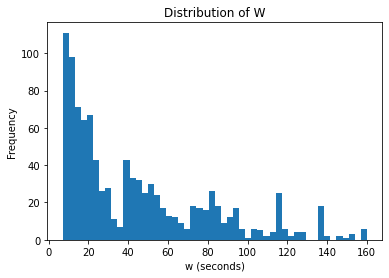

In [285]:
fix, ax = plt.subplots()
ax.hist(vals, bins=50, linewidth=1)

ax.set_ylabel('Frequency')
ax.set_xlabel('w (seconds)')
ax.set_title('Distribution of W')

plt.show()

# Get values from distribution

In [314]:
def cdf(a, left, right):
    x = 0
    for v in a:
        if left <= v <= right: x += v
    return x.item() / a.sum().item()

In [311]:
import numpy as np
a = np.array(vals)
a.sort()
np.mean(a), np.median(a), np.quantile(a, 0.25), np.quantile(a, 0.75)

(43.936015816626686, 30.87503463989006, 14.815166609966825, 63.687242524568205)

In [316]:
for upper_bound in [15, 20, 30]:
    print(f"(0, {upper_bound}): {cdf(a, 0, upper_bound):.2f}")

for lower_bound in [40, 80, 140]:
    print(f"({lower_bound},): {cdf(a, lower_bound, 99999):.2f}")

(0, 15): 0.06
(0, 20): 0.11
(0, 30): 0.18
(40,): 0.77
(80,): 0.44
(140,): 0.05


# Plot distribution as PDF

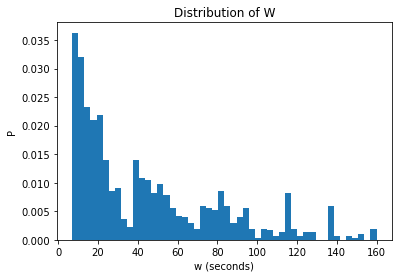

In [327]:
fix, ax = plt.subplots()
ax.hist(vals, bins=50, linewidth=1, density=True)

ax.set_ylabel('P')
ax.set_xlabel('w (seconds)')
ax.set_title('Distribution of W')

plt.show()